###  print out structures

In [1]:
import random
import numpy as np
import pprint

from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot

np.random.seed(1337)
random.seed(1337)
pp = pprint.PrettyPrinter(indent=4)

#### 1 Layer with 3 neurons, 1 output

kwarg  nonlin
kwarg  weightsinit
kwarg  debug_bw
Layer:  Layer of [LinearNeuron(3)]
Neurons:  [LinearNeuron(3)]
parameters
[   Value(name=v001,layernumber=L,neuronnumber=n1,weightnumber=,type=w1,data=0.1, grad=0),
    Value(name=v002,layernumber=L,neuronnumber=n1,weightnumber=,type=w2,data=0.2, grad=0),
    Value(name=v003,layernumber=L,neuronnumber=n1,weightnumber=,type=w3,data=0.30000000000000004, grad=0),
    Value(name=v004,layernumber=L,neuronnumber=n1,weightnumber=,type=b,data=0, grad=0)]
inputs
[   Value(name=v005,layernumber=,neuronnumber=,weightnumber=,type=i,data=1, grad=0),
    Value(name=v006,layernumber=,neuronnumber=,weightnumber=,type=i,data=2, grad=0),
    Value(name=v007,layernumber=,neuronnumber=,weightnumber=,type=i,data=3, grad=0)]
backward mul   v002   0.00 ->   2.00 v006   0.00 ->   0.20
backward mul   v001   0.00 ->   1.00 v005   0.00 ->   0.10
backward mul   v003   0.00 ->   3.00 v007   0.00 ->   0.30
number of Value objects created =  13
activation:  Value(name

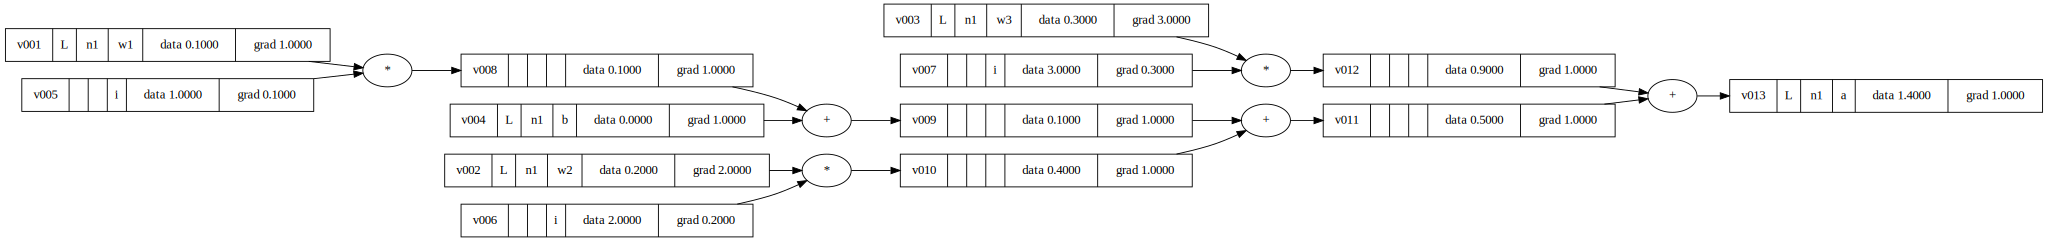

In [2]:
nin=3  #number of inputs
nout=1  #number of outputs
nonlin=False
Value.value_counter=0

myLayer=Layer(nin,nout,nonlin=nonlin, weightsinit=1, debug_bw=True)
print("Layer: ",myLayer)
print("Neurons: ",myLayer.neurons)
print("parameters")
pp.pprint(myLayer.parameters())

# xinumbers= np.random.randint(1,10, size=(nin))   # inputs
xinumbers = list(range(1, nin+1))
xinput = [Value(x,type='i') for x in xinumbers]
print("inputs")
pp.pprint(xinput)

activation=myLayer(xinput)
activation.backward()

print("number of Value objects created = ",Value.value_counter)

print("activation: ",activation)
draw_dot(activation)

#### 1 Layer with 2 inputs, 2 neurons, 2 outputs

kwarg  nonlin
kwarg  weightsinit
kwarg  debug_bw
Layer:  Layer of [LinearNeuron(2), LinearNeuron(2)]
parameters
[   Value(name=v001,layernumber=L,neuronnumber=n1,weightnumber=,type=w1,data=0.5, grad=0),
    Value(name=v002,layernumber=L,neuronnumber=n1,weightnumber=,type=w2,data=1.0, grad=0),
    Value(name=v003,layernumber=L,neuronnumber=n1,weightnumber=,type=b,data=0, grad=0),
    Value(name=v004,layernumber=L,neuronnumber=n2,weightnumber=,type=w1,data=0.5, grad=0),
    Value(name=v005,layernumber=L,neuronnumber=n2,weightnumber=,type=w2,data=1.0, grad=0),
    Value(name=v006,layernumber=L,neuronnumber=n2,weightnumber=,type=b,data=0, grad=0)]
inputs
[   Value(name=v007,layernumber=,neuronnumber=,weightnumber=,type=i,data=1, grad=0),
    Value(name=v008,layernumber=,neuronnumber=,weightnumber=,type=i,data=2, grad=0)]
activation
[   Value(name=v012,layernumber=L,neuronnumber=n1,weightnumber=,type=a,data=2.5, grad=0),
    Value(name=v016,layernumber=L,neuronnumber=n2,weightnumber=,type=a

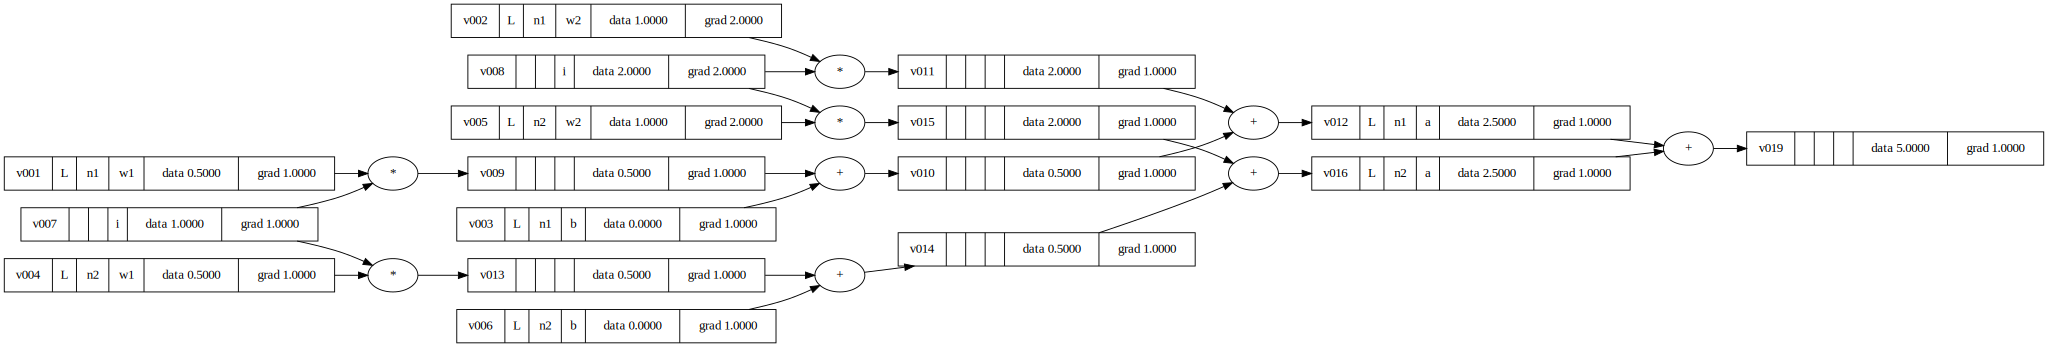

In [3]:
nin = 2  # number of inputs
nout = 2  # number of outputs
nonlin = False
Value.value_counter = 0

myLayer = Layer(nin, nout, nonlin=nonlin, weightsinit=2, debug_bw=True)
print("Layer: ", myLayer)
# print("Neurons: ",myLayer.neurons)
print("parameters")
pp.pprint(myLayer.parameters())

# xinumbers= np.random.randint(1,10, size=(nin))   # inputs
xinumbers = list(range(1, nin + 1))
xinput = [Value(x, type="i") for x in xinumbers]
print("inputs")
pp.pprint(xinput)

activation = myLayer(xinput)
print("activation")
pp.pprint(activation)

print("number of Value objects created = ", Value.value_counter)

ys = [1.2, 1.3]  # desired targets
xtarget = [Value(x, type="t") for x in ys]
print("desired outputs ")
pp.pprint(xtarget)

# loss = sum((yout - ygt) ** 2 for ygt, yout in zip(activation, xtarget))
loss = activation[1] + activation[0]
loss.backward()
print("number of Value objects created = ", Value.value_counter)

draw_dot(loss)